In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [2]:
tf.set_random_seed(777)  # for reproducibility

In [3]:
# 예시 Data 읽어오기
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# 내부 Y의 값은 0~9로 10개의 classes를 가짐
nb_classes = 10

In [7]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])

Y = tf.placeholder(tf.float32, [None, nb_classes])

In [9]:
# W shape 유의
W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [11]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [12]:
# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [13]:
# parameters
num_epochs = 15 # 1 epoch : 전체 Data를 한 번 돌며 Learning을 수행
batch_size = 100 # 1 epoch 중 몇 개씩 끊어서 Learning을 수행할 것인가
# 전체 data / batch : 1 epoch이 되기 위해 몇 batch 가 필요한가 = total_batch
num_iterations = int(mnist.train.num_examples / batch_size)

Epoch: 0001, Cost: 3.192832699
Epoch: 0002, Cost: 1.143017155
Epoch: 0003, Cost: 0.903392763
Epoch: 0004, Cost: 0.785172412
Epoch: 0005, Cost: 0.710797451
Epoch: 0006, Cost: 0.657594607
Epoch: 0007, Cost: 0.618916576
Epoch: 0008, Cost: 0.587592330
Epoch: 0009, Cost: 0.562361461
Epoch: 0010, Cost: 0.540687444
Epoch: 0011, Cost: 0.522939739
Epoch: 0012, Cost: 0.507364039
Epoch: 0013, Cost: 0.493274985
Epoch: 0014, Cost: 0.480982102
Epoch: 0015, Cost: 0.470171307
Learning finished
Accuracy:  0.8899
Label:  [3]
Prediction:  [3]


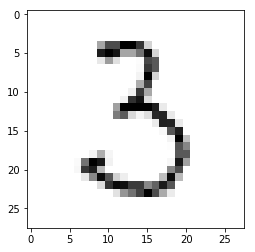

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training cycle , Data를 num_epochs만큼 재사용해서 Learning을 시작
    for epoch in range(num_epochs):
        avg_cost = 0
        # batch에 맞게 끊어서 Learning을 수행, 1 epoch를 채울 때까지
        for i in range(num_iterations): 
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))
        
    print("Learning finished")
    # Test Data를 통해 점검
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )
    
    # Label :실제 Data와 예측 Data를 비교
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )
    # matplot을 통해 확인
    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()